Integrantes Cp1 Data Science

RM - 98290 - Nome - Luan Silveira Macea
RM - 98047 - Nome - Luigi Ferrara Sinno

In [132]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [133]:
dfNetflix = pd.read_csv('netflix_titles.csv')
dfTomatoesMovies = pd.read_csv('rotten_tomatoes_movies.csv')

Pergunta 1: Quais os gêneros mais produzidos em 2010?

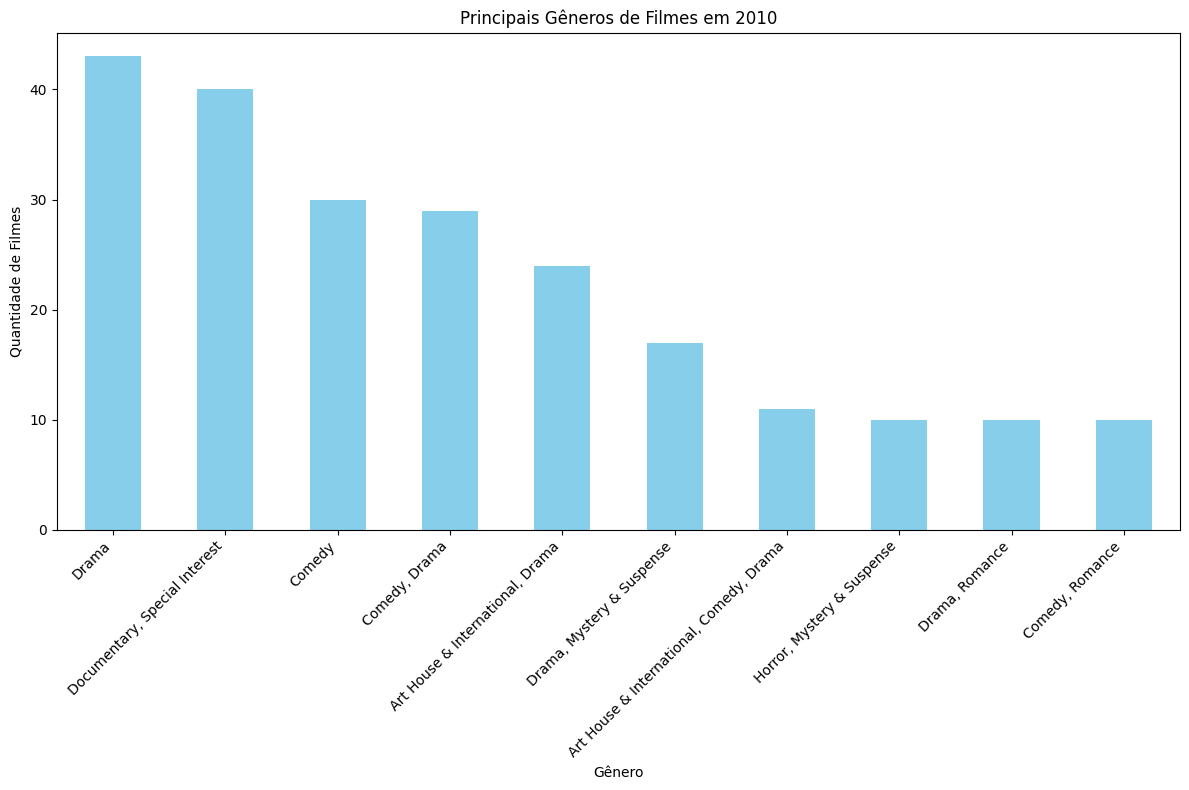

In [134]:
dfTomatoesMovies['original_release_date'] = pd.to_datetime(dfTomatoesMovies['original_release_date'])

# Filtrar os filmes de 2023
df_tomatoes_2010 = dfTomatoesMovies[dfTomatoesMovies['original_release_date'].dt.year == 2010]

# Contar a frequência de cada gênero
genre_counts = df_tomatoes_2010['genres'].value_counts()

# # Mostrar os principais gêneros
plt.figure(figsize=(12, 8))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Principais Gêneros de Filmes em 2010')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibir o gráfico
plt.show()


Pergunta 2: Qual a media de temporadas das series da netflix em 2010

A média de temporadas das séries de TV em 2010 é: 1.65


c:\AppData\Local\Temp\ipykernel_14136\648771410.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_2010['seasons'] = df_netflix_2010['duration'].apply(extract_seasons)


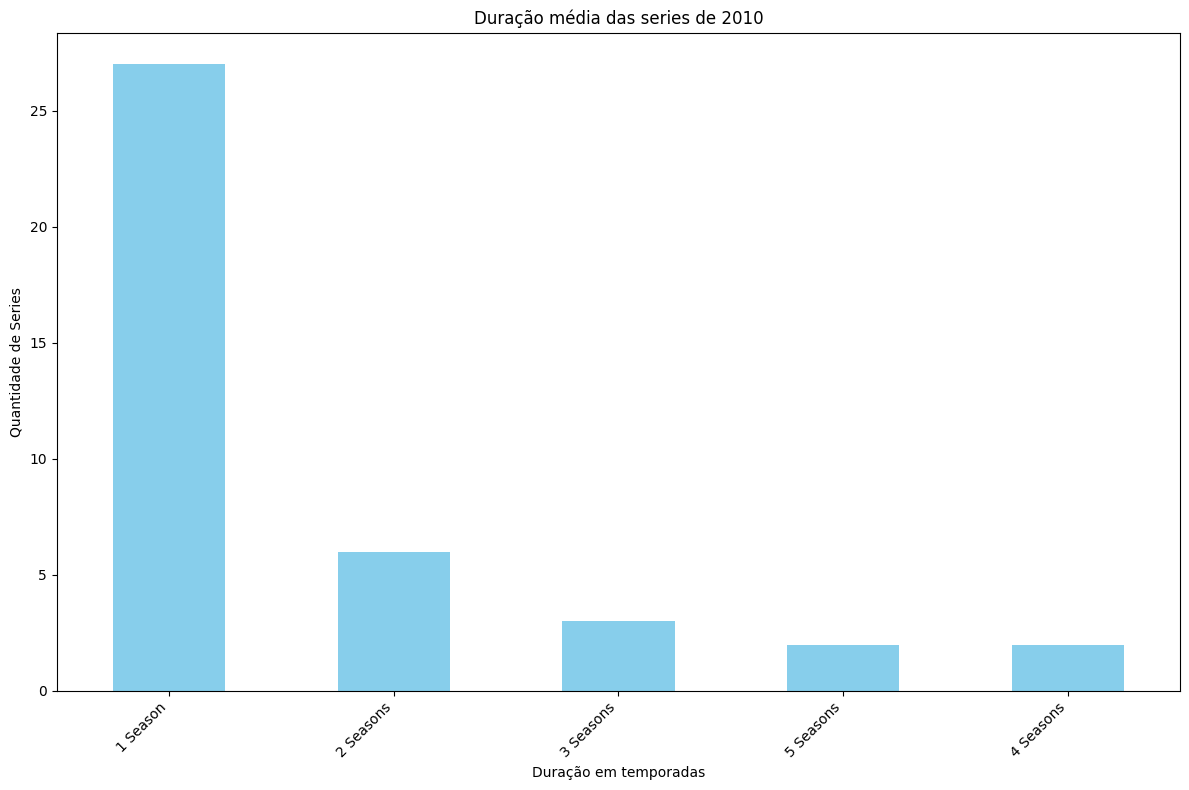

-------------------------------
A média de temporadas das séries de TV em 2010 é: 1.65
-------------------------------


In [135]:
# Filtrando a base de daddos
df_netflix_2010 = dfNetflix[(dfNetflix['release_year'] == 2010) & (dfNetflix['type'] == 'TV Show')]

#contando a quantidade de cada duração
duration_counts = df_netflix_2010['duration'].value_counts()

# Função para extrair o número de temporadas
def extract_seasons(duration_str):
    if pd.isna(duration_str):
        return None
    try:
        return int(duration_str.split(' ')[0])
    except (IndexError, ValueError):
        return None

# Aplicar a função na coluna 'duration'
df_netflix_2010['seasons'] = df_netflix_2010['duration'].apply(extract_seasons)

# Calcular a média do número de temporadas
average_seasons = df_netflix_2010['seasons'].mean()

print(f'A média de temporadas das séries de TV em 2010 é: {average_seasons:.2f}')

# # Mostrar os principais gêneros
plt.figure(figsize=(12, 8))
duration_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Duração média das series de 2010')
plt.xlabel('Duração em temporadas')
plt.ylabel('Quantidade de Series')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibir o gráfico
plt.show()
print ('-------------------------------')
print(f'A média de temporadas das séries de TV em 2010 é: {average_seasons:.2f}')
print ('-------------------------------')


Pergunta 3: Quantos filmes cada país produziu em 2010

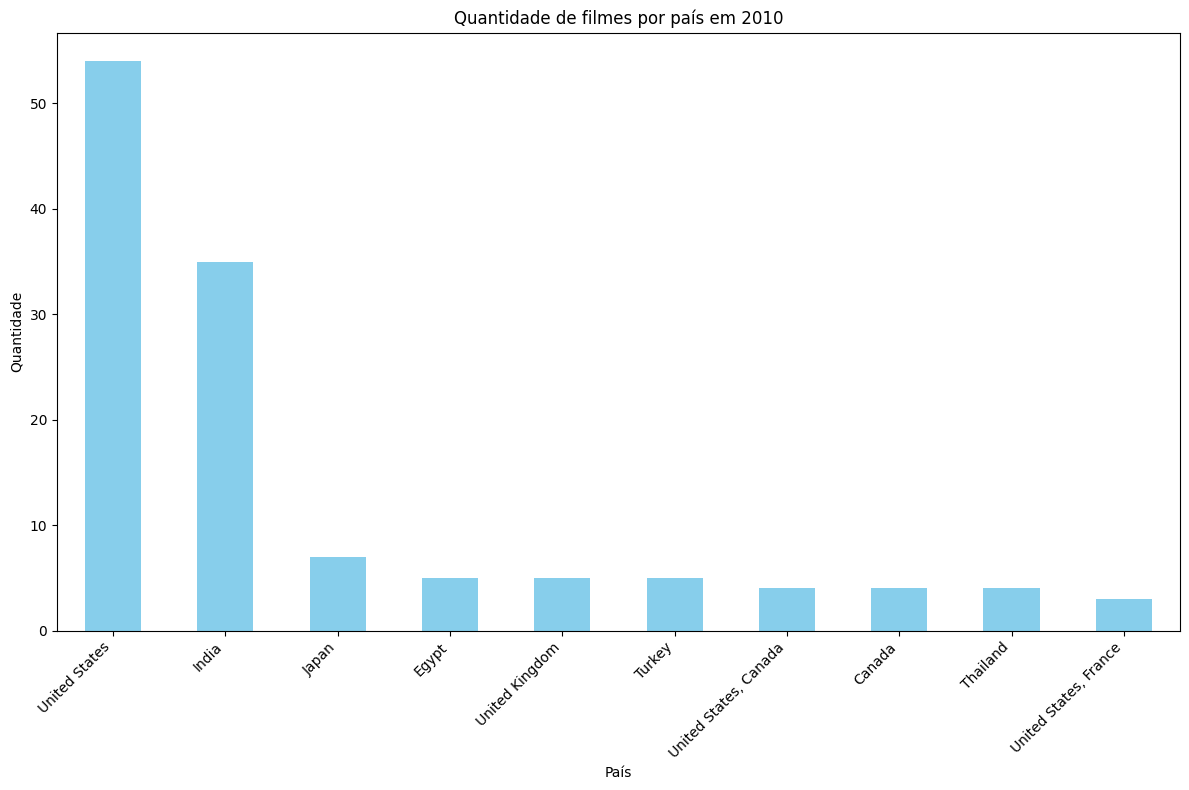

In [136]:
# Contagem de filmes por país
pais_count = dfNetflix[dfNetflix['release_year'] == 2010]['country'].value_counts()

# Montando o gráfico
plt.figure(figsize=(12, 8))
pais_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Quantidade de filmes por país em 2010')
plt.xlabel('País')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibir o gráfico
plt.show()

Pergunta 4: Qual é a relação entre a duração dos filmes e a sua avaliação por críticos em 2010? (Testando uma hipótese)

   runtime
0    119.0
1     90.0
2    122.0
3     95.0
4    127.0


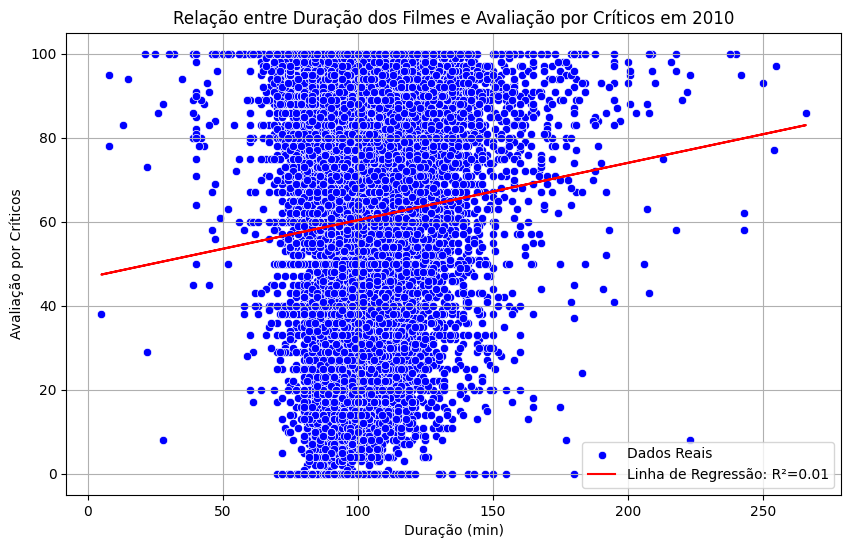

-------------------------------
R² da regressão linear: 0.01
-------------------------------


In [137]:
# Garantir que 'runtime' é do tipo string antes de aplicar .str.extract
dfTomatoesMovies['runtime'] = dfTomatoesMovies['runtime'].astype(str)

# Pegando os numeros em minutos
dfTomatoesMovies['runtime'] = dfTomatoesMovies['runtime'].str.extract('(\d+)').astype(float)

# Verificando se teve erro
print(dfTomatoesMovies[['runtime']].head())

# Garantir que 'tomatometer_rating' é do tipo float
dfTomatoesMovies['tomatometer_rating'] = pd.to_numeric(dfTomatoesMovies['tomatometer_rating'], errors='coerce')

# Remover linhas com valores nulos para as colunas de interesse
df_filtered = dfTomatoesMovies[['runtime', 'tomatometer_rating']].dropna()

# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['runtime'], df_filtered['tomatometer_rating'])

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='tomatometer_rating', data=df_filtered, color='blue', label='Dados Reais')
plt.plot(df_filtered['runtime'], intercept + slope * df_filtered['runtime'], color='red', label=f'Linha de Regressão: R²={r_value**2:.2f}')
plt.title('Relação entre Duração dos Filmes e Avaliação por Críticos em 2010')
plt.xlabel('Duração (min)')
plt.ylabel('Avaliação por Críticos')
plt.legend()
plt.grid(True)
plt.show()

print ('-------------------------------')
print(f'R² da regressão linear: {r_value**2:.2f}')
print ('-------------------------------')

Pergunta 5: Qual é a tendência de avaliações ao longo do ano de 2010?

c:\AppData\Local\Temp\ipykernel_14136\1615754068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010['month'] = df_2010['original_release_date'].dt.month
c:\AppData\Local\Temp\ipykernel_14136\1615754068.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010['audience_rating'] = pd.to_numeric(df_2010['audience_rating'], errors='coerce')


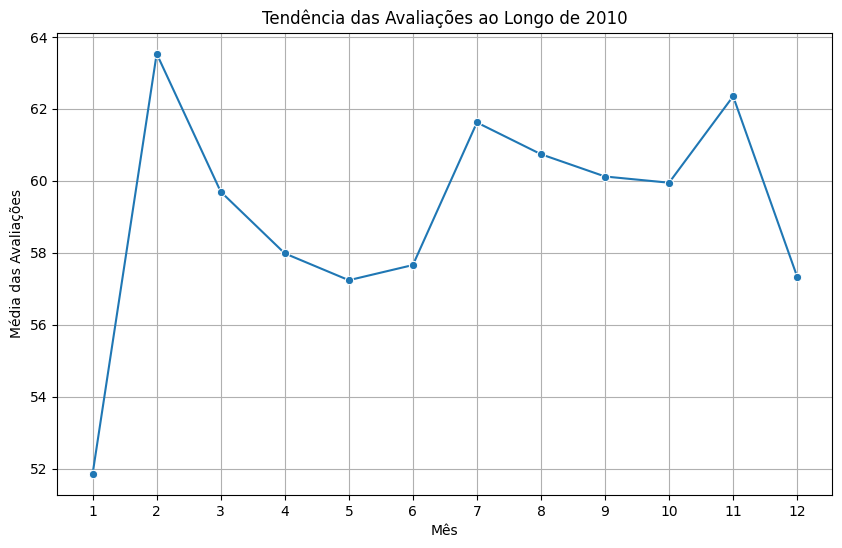

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar os filmes de 2010
dfTomatoesMovies['original_release_date'] = pd.to_datetime(dfTomatoesMovies['original_release_date'], errors='coerce')
df_2010 = dfTomatoesMovies[dfTomatoesMovies['original_release_date'].dt.year == 2010]

# Extrair mês da data de lançamento
df_2010['month'] = df_2010['original_release_date'].dt.month

# Converter 'audience_rating' para numérico (com tratamento de erros)
df_2010['audience_rating'] = pd.to_numeric(df_2010['audience_rating'], errors='coerce')

# Calcular a média das avaliações por mês
mensal_avaliacoes = df_2010.groupby('month')['audience_rating'].mean()

# Gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=mensal_avaliacoes.index, y=mensal_avaliacoes.values, marker='o')
plt.title('Tendência das Avaliações ao Longo de 2010')
plt.xlabel('Mês')
plt.ylabel('Média das Avaliações')
plt.xticks(range(1, 13)) 
plt.grid(True)
plt.show()


Pergunta 6: Qual é a distribuição dos ratings (classificação etária) dos filmes em 2010?

c:\AppData\Local\Temp\ipykernel_14136\4033936759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='viridis')


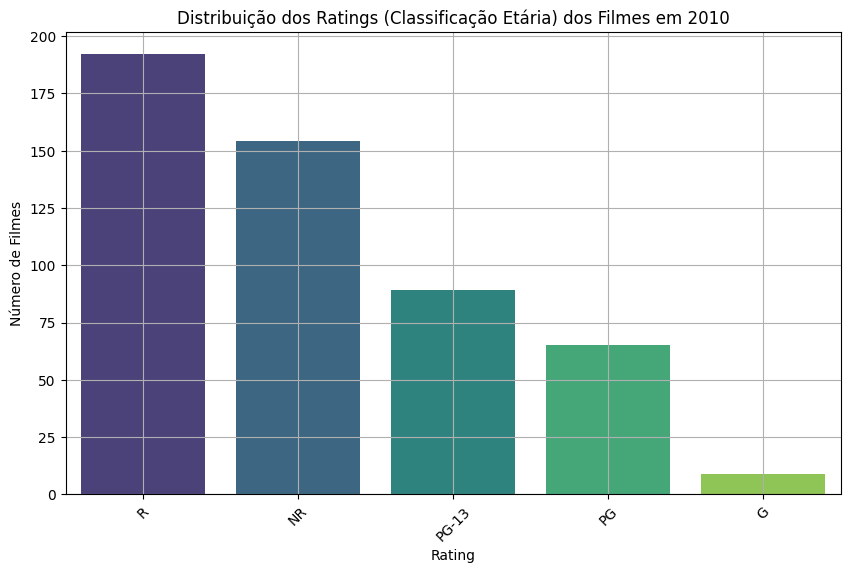

-------------------------------
content_rating
R        192
NR       154
PG-13     89
PG        65
G          9
Name: count, dtype: int64
-------------------------------


In [139]:
# Filtrar filmes de 2010
df_2010 = dfTomatoesMovies[dfTomatoesMovies['original_release_date'].dt.year == 2010]

# Contar a frequência de cada rating
rating_distribution = df_2010['content_rating'].value_counts()

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='viridis')
plt.title('Distribuição dos Ratings (Classificação Etária) dos Filmes em 2010')
plt.xlabel('Rating')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print ('-------------------------------')
print(rating_distribution)
print ('-------------------------------')

Pergunta 7: Quais são os diretores mais frequentes nos filmes lançados em 2010?

In [140]:
# Contar a frequência de cada diretor
director_counts = df_2010['directors'].str.split(',', expand=True).stack().str.strip().value_counts()

print ('-------------------------------')
print(director_counts.head(20))
print ('-------------------------------')


-------------------------------
Alex Gibney              3
Tyler Perry              2
Thomas Balmès            2
Jean-François Richet     2
Henry Joost              2
Kate Davis               2
David Heilbroner         2
Daniel Alfredson         2
Adam Green               2
Lucy Walker              2
Rodrigo Cortés           2
Oliver Stone             2
Tom DiCillo              1
Rob Stefaniuk            1
Miguel Arteta            1
Chris Columbus           1
Nicole Holofcener        1
Álex de la Iglesia       1
Rick Jacobson            1
Margarethe von Trotta    1
Name: count, dtype: int64
-------------------------------


Pergunta 8: Qual a duração média dos filmes lançados em 2010?

In [141]:
# Converter a coluna 'runtime' para numérico
df_2010['runtime'] = pd.to_numeric(df_2010['runtime'], errors='coerce')

# Calcular a duração média
average_runtime = df_2010['runtime'].mean()

print ('-------------------------------')
print(f'Duração média dos filmes lançados em 2010: {average_runtime:.2f} minutos')
print ('-------------------------------')


-------------------------------
Duração média dos filmes lançados em 2010: 101.91 minutos
-------------------------------


c:\AppData\Local\Temp\ipykernel_14136\3772040514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010['runtime'] = pd.to_numeric(df_2010['runtime'], errors='coerce')


Pergunta 9: Qual é a distribuição de tipos de conteúdo (filmes e séries) produzidos por país em 2010?

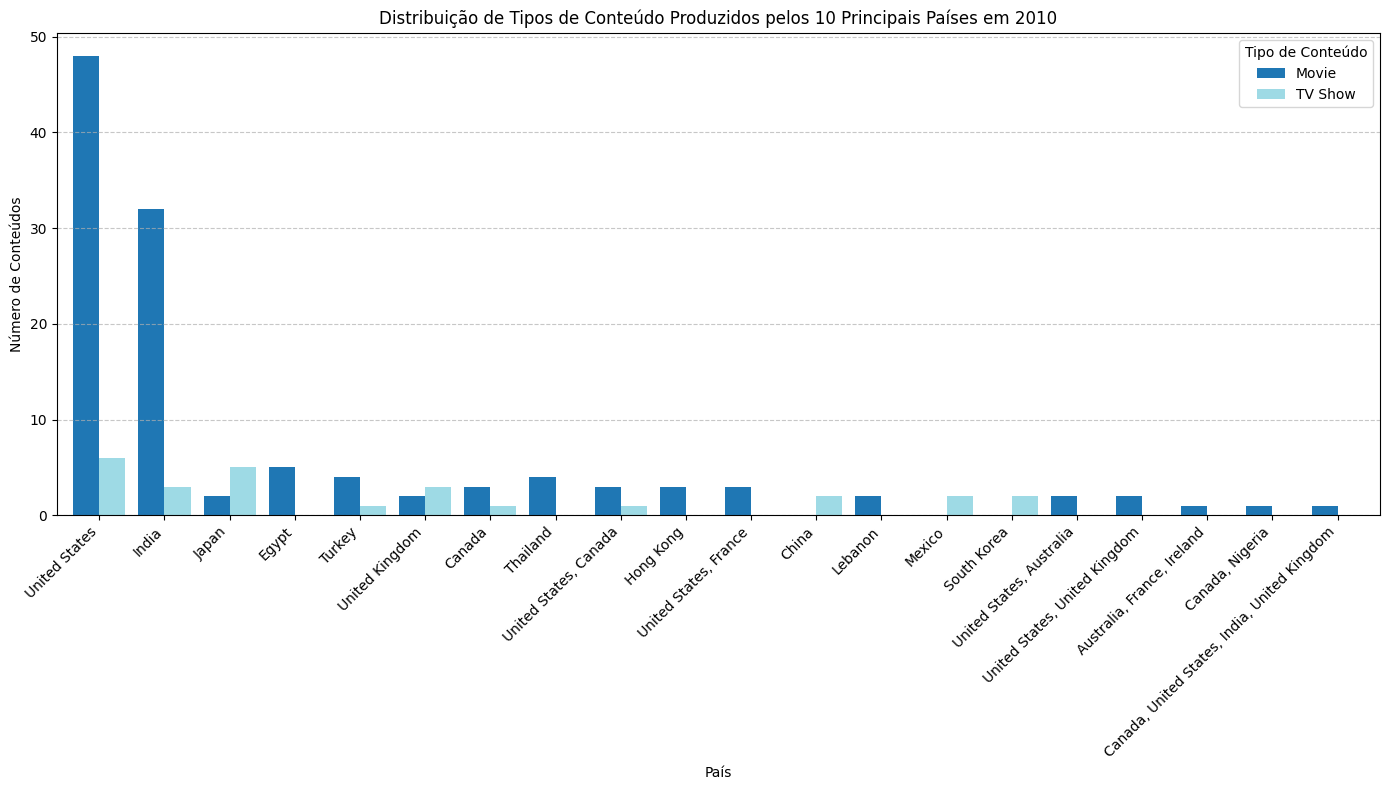

-------------------------------
type                                          Movie  TV Show
country                                                     
United States                                  48.0      6.0
India                                          32.0      3.0
Japan                                           2.0      5.0
Egypt                                           5.0      0.0
Turkey                                          4.0      1.0
United Kingdom                                  2.0      3.0
Canada                                          3.0      1.0
Thailand                                        4.0      0.0
United States, Canada                           3.0      1.0
Hong Kong                                       3.0      0.0
United States, France                           3.0      0.0
China                                           0.0      2.0
Lebanon                                         2.0      0.0
Mexico                                          0.0  

In [142]:
dfNetflix_2010 = dfNetflix[dfNetflix['release_year'] == 2010]

# Contar a frequência de tipos de conteúdo por país
content_by_country = dfNetflix_2010.groupby('country')['type'].value_counts().unstack().fillna(0)

# Selecionar os 10 principais países com base no total de conteúdos
top_countries = content_by_country.sum(axis=1).nlargest(20).index
content_by_country_top = content_by_country.loc[top_countries]

# Gráfico de barras agrupadas
content_by_country_top.plot(kind='bar', figsize=(14, 8), colormap='tab20', width=0.8)
plt.title('Distribuição de Tipos de Conteúdo Produzidos pelos 10 Principais Países em 2010')
plt.xlabel('País')
plt.ylabel('Número de Conteúdos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Conteúdo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print ('-------------------------------')
print(content_by_country_top)
print ('-------------------------------')

Pergunta 10: Qual é a média de avaliações do público para filmes de diferentes gêneros em 2010?


c:\AppData\Local\Temp\ipykernel_14136\3080742696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010['audience_rating'] = pd.to_numeric(df_2010['audience_rating'], errors='coerce')


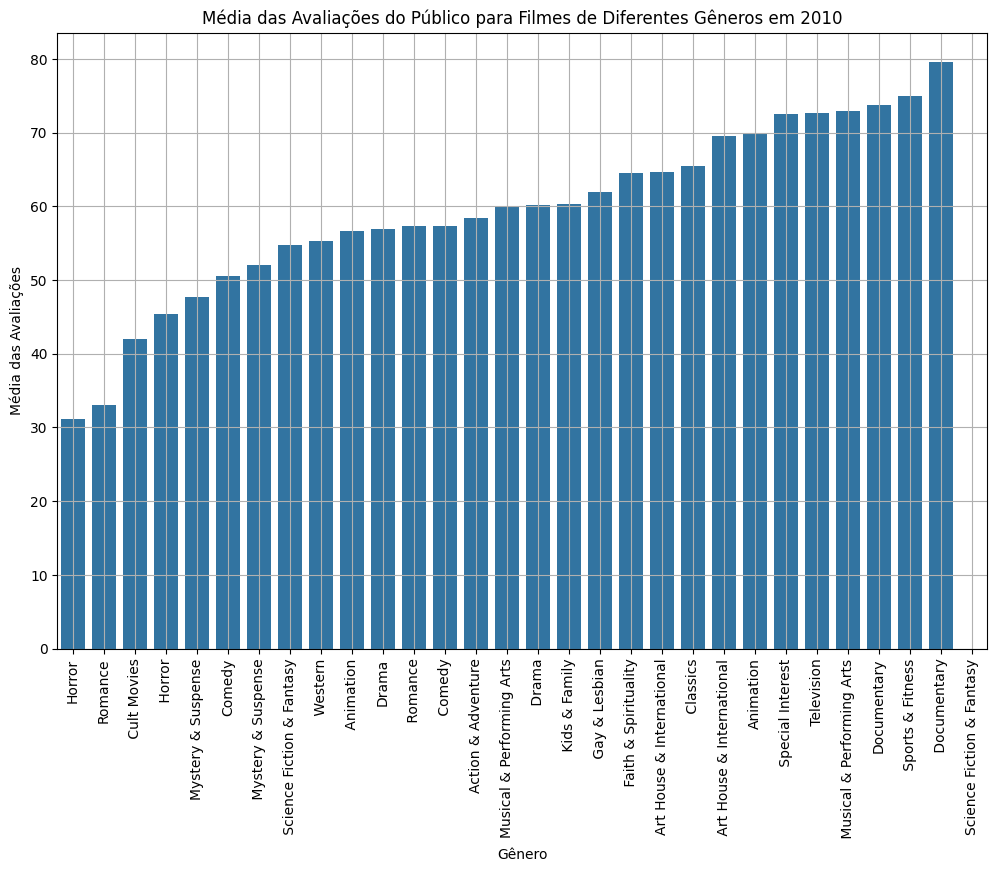

-------------------------------
genres
Horror                        31.117647
Romance                       33.000000
 Cult Movies                  42.000000
 Horror                       45.419355
Mystery & Suspense            47.750000
Comedy                        50.566038
 Mystery & Suspense           51.978261
 Science Fiction & Fantasy    54.755556
 Western                      55.333333
 Animation                    56.714286
Drama                         56.980000
 Romance                      57.274194
 Comedy                       57.359375
Action & Adventure            58.436170
Musical & Performing Arts     60.000000
 Drama                        60.151163
 Kids & Family                60.352941
 Gay & Lesbian                62.000000
 Faith & Spirituality         64.500000
Art House & International     64.632184
 Classics                     65.500000
 Art House & International    69.476190
Animation                     69.846154
 Special Interest             72.576923
 

In [143]:
# Filtrar os filmes de 2010
df_2010 = dfTomatoesMovies[dfTomatoesMovies['original_release_date'].dt.year == 2010]

# Converter 'audience_rating' para numérico
df_2010['audience_rating'] = pd.to_numeric(df_2010['audience_rating'], errors='coerce')

# Explodir a coluna de gêneros para ter uma linha por gênero
df_2010_exploded = df_2010.assign(genres=df_2010['genres'].str.split(',')).explode('genres')

# Calcular a média das avaliações do público por gênero
genre_avg_ratings = df_2010_exploded.groupby('genres')['audience_rating'].mean().sort_values()

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_avg_ratings.index, y=genre_avg_ratings.values)
plt.title('Média das Avaliações do Público para Filmes de Diferentes Gêneros em 2010')
plt.xlabel('Gênero')
plt.ylabel('Média das Avaliações')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

print ('-------------------------------')
print(genre_avg_ratings)
print ('-------------------------------')
